# Overview

This script will compile all wrong predictions of the stance, sentiment and combined stance/sentiment models into a single data frame. \\
This will be helpful to analyze and compare results.


There will be added columns to indicate the model and seed from which the prediction is from.

We will create graphs to analyze and compare:
- what tweets appeared in each model
- most common missclassifications made in each model
- number of missclassifications from each model

# Set up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_venn as venn
import os

## Global Variables

In [3]:
FOLDER_PATH = '/content/drive/MyDrive/pesquisa-usp/data_classification_models/wrong_predictions/'
PREDICTIONS_PATH = 'wrong_predictions_'

STANCE_PATH = '/content/drive/MyDrive/pesquisa-usp/data_classification_models/stance/'
SENTIMENT_PATH = '/content/drive/MyDrive/pesquisa-usp/data_classification_models/sentiment/'
COMBINED_PATH = '/content/drive/MyDrive/pesquisa-usp/data_classification_models/stance-sentiment/'


SEEDS = [66, 109, 85, 42, 120, 172, 239, 19, 124, 48, 83, 184, 47, 160, 238, 49, 209, 110, 174, 118]

SEED_FOLDERS = ['seed_66/', 'seed_109/', 'seed_85/', 'seed_42/', 'seed_120/',
                'seed_172/', 'seed_239/', 'seed_19/', 'seed_124/', 'seed_48/',
                'seed_83/', 'seed_184/', 'seed_47/', 'seed_160/', 'seed_238/',
                'seed_49/', 'seed_209/', 'seed_110/', 'seed_174/', 'seed_118/']

SEED_CVS = ['seed66.cvs', 'seed109.cvs', 'seed85.cvs', 'seed42.cvs', 'seed120.cvs',
            'seed172.cvs', 'seed239.cvs', 'seed19.cvs', 'seed124.cvs', 'seed48.cvs',
            'seed83.cvs', 'seed184.cvs', 'seed47.cvs', 'seed160.cvs', 'seed238.cvs',
            'seed49.cvs', 'seed209.cvs', 'seed110.cvs', 'seed174.cvs', 'seed118.cvs']


POST_ID = 'post id'
POST = 'post content'


PREDICTION = 'prediction'
CORRECTION = 'correct label'


POSITIVE_SENTIMENT = 'positive'
NEGATIVE_SENTIMENT = 'negative'

POSITIVE_STANCE = 'favorable'
NEGATIVE_STANCE = 'unfavorable'

COMBINED_CLASSES = {0: (NEGATIVE_STANCE + '/' + NEGATIVE_SENTIMENT),
                    1: (NEGATIVE_STANCE + '/' + POSITIVE_SENTIMENT),
                    2: (NEGATIVE_STANCE + '/unclear'),
                    3: (POSITIVE_STANCE + '/' + NEGATIVE_SENTIMENT),
                    4: (POSITIVE_STANCE + '/' + POSITIVE_SENTIMENT),
                    5: (POSITIVE_STANCE + '/unclear'),
                    6: ('unclear/' + NEGATIVE_SENTIMENT),
                    7: ('unclear/' + POSITIVE_SENTIMENT),
                    8: ('unclear/unclear')}

# Compile Wrong Predictions

Create general dataframe:

In [4]:
main_df = pd.DataFrame(columns = ['post id','post content', 'model', 'seed',
                                  'predicted - stance', 'correct - stance',
                                  'predicted - sentiment', 'correct - sentiment',
                                  'predicted - combined', 'correct - combined'])

main_df

,post id,post content,model,seed,predicted - stance,correct - stance,predicted - sentiment,correct - sentiment,predicted - combined,correct - combined


Add stance predictions:

In [5]:
stance_rows = []

# iterate through folders of every seed:
for i in range (len(SEED_FOLDERS)):

    # get seed folder name:
    seed_path = os.path.join(STANCE_PATH, SEED_FOLDERS[i])

    if os.path.isdir(seed_path):

        # get wrong predictions cvs file:
        csv_file = None
        csv_file = os.path.join(seed_path, (PREDICTIONS_PATH + SEED_CVS[i]))


        # transfer rows to main dataframe:
        if os.path.isfile(csv_file):

            stance_df = pd.read_csv(csv_file)

            for row in range(len(stance_df)):
                new_row = {'post id': stance_df.at[row, POST_ID],
                          'post content': stance_df.at[row,POST],
                          'model': 'stance',
                          'seed': SEEDS[i],
                          'predicted - stance': stance_df.at[row,PREDICTION],
                          'correct - stance': stance_df.at[row,CORRECTION],
                          'predicted - sentiment': '-',
                          'correct - sentiment': '-',
                          'predicted - combined': '-',
                          'correct - combined': '-'}

                stance_rows.append(new_row)


main_df = pd.concat([main_df, pd.DataFrame(stance_rows)], ignore_index=True)

Get all sentiment predictions:

In [6]:
sentiment_rows = []

# iterate through folders of every seed:
for i in range (len(SEED_FOLDERS)):

    # get seed folder name:
    seed_path = os.path.join(SENTIMENT_PATH, SEED_FOLDERS[i])

    if os.path.isdir(seed_path):

        # get wrong predictions cvs file:
        csv_file = None
        csv_file = os.path.join(seed_path, (PREDICTIONS_PATH + SEED_CVS[i]))


        # transfer rows to main dataframe:
        if os.path.isfile(csv_file):

            sentiment_df = pd.read_csv(csv_file)

            for row in range(len(sentiment_df)):

                new_row = {'post id': sentiment_df.at[row, POST_ID],
                          'post content': sentiment_df.at[row,POST],
                          'model': 'sentiment',
                          'seed': SEEDS[i],
                          'predicted - stance': '-',
                          'correct - stance': '-',
                          'predicted - sentiment': sentiment_df.at[row,PREDICTION],
                          'correct - sentiment': sentiment_df.at[row,CORRECTION],
                          'predicted - combined': '-',
                          'correct - combined': '-'}

                sentiment_rows.append(new_row)


main_df = pd.concat([main_df, pd.DataFrame(sentiment_rows)], ignore_index=True)

Get all combined stance-sentiment predictions:

In [7]:
combined_rows = []

# iterate through folders of every seed:
for i in range (len(SEED_FOLDERS)):

    # get seed folder name:
    seed_path = os.path.join(COMBINED_PATH, SEED_FOLDERS[i])

    if os.path.isdir(seed_path):

        # get wrong predictions cvs file:
        csv_file = None
        csv_file = os.path.join(seed_path, (PREDICTIONS_PATH + SEED_CVS[i]))


        # transfer rows to main dataframe:
        if os.path.isfile(csv_file):

            combined_df = pd.read_csv(csv_file)

            for row in range(len(combined_df)):

                new_row = {'post id': combined_df.at[row, POST_ID],
                          'post content': combined_df.at[row,POST],
                          'model': 'combined',
                          'seed': SEEDS[i],
                          'predicted - stance': '-',
                          'correct - stance': '-',
                          'predicted - sentiment': '-',
                          'correct - sentiment': '-',
                          'predicted - combined': combined_df.at[row,PREDICTION],
                          'correct - combined': combined_df.at[row,CORRECTION]}

                combined_rows.append(new_row)


main_df = pd.concat([main_df, pd.DataFrame(combined_rows)], ignore_index=True)

In [8]:
main_df

,post id,post content,model,seed,predicted - stance,correct - stance,predicted - sentiment,correct - sentiment,predicted - combined,correct - combined
0,A518,POA ESTÁ PREPARADA PARA A VOLTA ÀS AULAS?\nO r...,stance,42,1,2,-,-,-,-
1,A1865,@zehdeabreu Querido @zehdeabreu esse cara é po...,stance,42,0,1,-,-,-,-
2,A1835,Ministério Público deu parecer favorável ao pe...,stance,42,1,2,-,-,-,-
3,A1837,"@MaxQmax2020 Tranquilo, seja bem vinda. Aprese...",stance,42,1,2,-,-,-,-
4,A1324,@jairbolsonaro já foi um “leão” contra a Anvis...,stance,42,0,1,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
146,A265,E o gov do Paraná segue o mesmo ritmo. Chegara...,combined,42,-,-,-,-,3,6
147,B1361,@gui_pinheiro A Cloroquina do Adeus,combined,42,-,-,-,-,7,6
148,A1021,‘MP da vacina’ acirra o conflito federativo ht...,combined,42,-,-,-,-,3,6
149,A1941,SAÚDE - Deputado Elias Vaz cobra informações s...,combined,42,-,-,-,-,6,3


In [9]:
path = FOLDER_PATH + 'compiled_wrong_predictions.cvs'
main_df.to_csv(path)

path = FOLDER_PATH + 'compiled_wrong_predictions.xlsx'
main_df.to_excel(path)

# Analytics

In [10]:
# main_df['post id'].value_counts()

In [11]:
df_list = [main_df]

In [12]:
unique_seeds = main_df['seed'].unique()

seed_dfs = {}

for seed in unique_seeds:
    seed_df = main_df[main_df['seed'] == seed]
    seed_dfs[seed] = seed_df



In [13]:
seed_dfs[42]

,post id,post content,model,seed,predicted - stance,correct - stance,predicted - sentiment,correct - sentiment,predicted - combined,correct - combined
0,A518,POA ESTÁ PREPARADA PARA A VOLTA ÀS AULAS?\nO r...,stance,42,1,2,-,-,-,-
1,A1865,@zehdeabreu Querido @zehdeabreu esse cara é po...,stance,42,0,1,-,-,-,-
2,A1835,Ministério Público deu parecer favorável ao pe...,stance,42,1,2,-,-,-,-
3,A1837,"@MaxQmax2020 Tranquilo, seja bem vinda. Aprese...",stance,42,1,2,-,-,-,-
4,A1324,@jairbolsonaro já foi um “leão” contra a Anvis...,stance,42,0,1,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
146,A265,E o gov do Paraná segue o mesmo ritmo. Chegara...,combined,42,-,-,-,-,3,6
147,B1361,@gui_pinheiro A Cloroquina do Adeus,combined,42,-,-,-,-,7,6
148,A1021,‘MP da vacina’ acirra o conflito federativo ht...,combined,42,-,-,-,-,3,6
149,A1941,SAÚDE - Deputado Elias Vaz cobra informações s...,combined,42,-,-,-,-,6,3


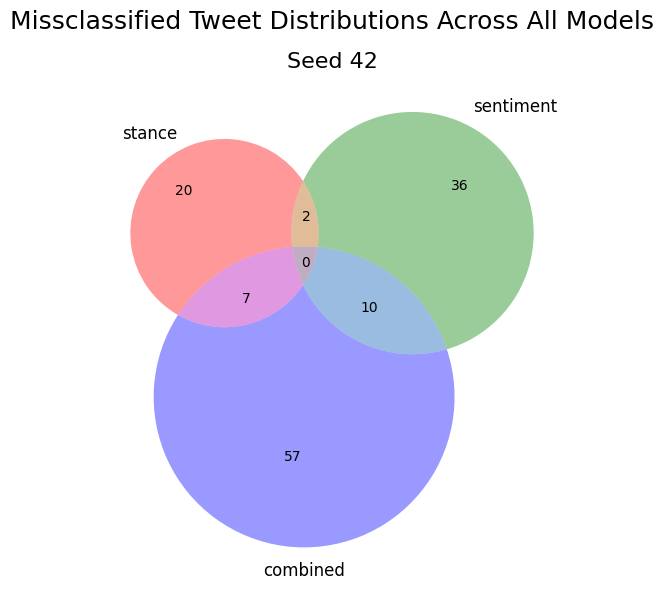

In [14]:
# create a figure with subplots
fig, axes = plt.subplots(ncols=len(seed_dfs), figsize=(8, 6))
fig.suptitle('Missclassified Tweet Distributions Across All Models', fontsize=18)


if len(seed_dfs) == 1:
    axes = [axes]
else:
    # Flatten the axes array in case of multiple rows/columns
    axes = axes.flatten()




for i, seed in enumerate(unique_seeds):

    seed_df = seed_dfs[seed]

    sub_fig = axes[i]

    tweet_groups = seed_df.groupby('model')['post id'].apply(set)

    venn.venn3([tweet_groups['stance'], tweet_groups['sentiment'], tweet_groups['combined']],
               set_labels=('stance', 'sentiment', 'combined'), ax=sub_fig)

    sub_fig.set_title(('Seed ' + str(seed)), fontsize=16)


plt.tight_layout()


plt.savefig((FOLDER_PATH + 'Missclassified_Tweet_Distributions_Across_All_Models_By_Seed.png'),
            format='png', transparent=True, bbox_inches='tight', pad_inches=0.1)


In [15]:
main_df['model'].value_counts()

,count
model,
combined,74
sentiment,48
stance,29


In [16]:
tweet_groups = main_df.groupby('model')['post id'].apply(set)

In [17]:
tweet_groups

,post id
model,
combined,"{A1933, A1670, A1015, A655, B10, A1021, A899, ..."
sentiment,"{A1933, A655, A1012, A286, A613, A995, A18, A1..."
stance,"{A1021, A1012, A1163, A286, A1532, A518, A990,..."


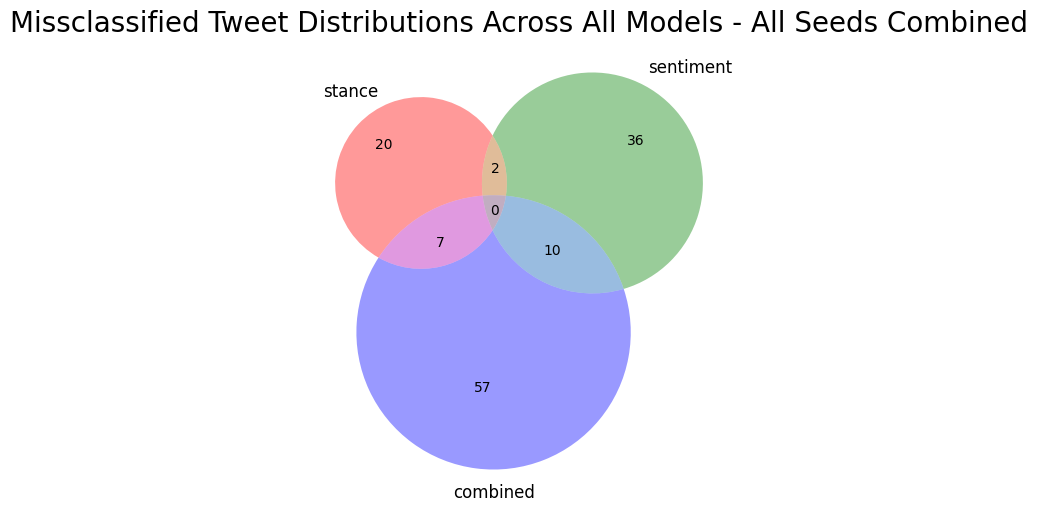

In [18]:
plt.figure(figsize=(8, 6))

venn.venn3([tweet_groups['stance'], tweet_groups['sentiment'], tweet_groups['combined']],
          set_labels=('stance', 'sentiment', 'combined'))

plt.title('Missclassified Tweet Distributions Across All Models - All Seeds Combined',fontsize=20)

plt.savefig((FOLDER_PATH + 'Missclassified_Tweet_Distributions_Across_All_Models.png'), format='png', transparent = True, bbox_inches='tight',pad_inches=0.1)

In [19]:
stance_set = tweet_groups.get('stance', set())
sentiment_set = tweet_groups.get('sentiment', set())
combined_set = tweet_groups.get('combined', set())

only_stance = sentiment_set  - stance_set - combined_set
only_sentiment = sentiment_set - stance_set - combined_set
only_combined = sentiment_set - stance_set - combined_set

stance_sentiment = (stance_set & sentiment_set) - combined_set
stance_combined = (stance_set & combined_set) - sentiment_set
sentiment_combined = (combined_set & sentiment_set) - stance_set

all = stance_set & sentiment_set & combined_set